In [1]:
info = """
LangChain 1.0 - Simple Agent (使用 create_agent)
=====================================================

本模块重点讲解：
1. 使用 create_agent 创建 Agent（LangChain 1.0 新 API）
2. Agent 自动决定何时使用工具
3. Agent 执行循环的工作原理

⚠️ 重要更新：
- LangChain 1.0 中，Agent 创建使用 `create_agent`
- 它来自 `langchain.agents` 模块（LangChain 1.0 新增）
- 旧的 `create_react_agent`（langgraph.prebuilt）已弃用
"""

print(info)


LangChain 1.0 - Simple Agent (使用 create_agent)

本模块重点讲解：
1. 使用 create_agent 创建 Agent（LangChain 1.0 新 API）
2. Agent 自动决定何时使用工具
3. Agent 执行循环的工作原理

⚠️ 重要更新：
- LangChain 1.0 中，Agent 创建使用 `create_agent`
- 它来自 `langchain.agents` 模块（LangChain 1.0 新增）
- 旧的 `create_react_agent`（langgraph.prebuilt）已弃用



In [2]:
import os
import sys

In [4]:
# 添加父目录到路径以导入工具
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, os.path.join(parent_dir, '04_custom_tools', 'tools'))


In [5]:
# load环境变量
from dotenv import load_dotenv
# init model
from langchain.chat_models import init_chat_model
# init agent
from langchain.agents import create_agent
# 多轮对话
from langgraph.checkpoint.memory import MemorySaver

In [7]:
# load cumstom tools
from weather import get_weather
from calculator import calculator
from web_search import web_search

In [8]:
load_dotenv()
GROQ_API_KEY = os.getenv("GROQ_API_KEY")

if not GROQ_API_KEY or GROQ_API_KEY == "your_groq_api_key_here":
    raise ValueError(
        "\n请先在 .env 文件中设置有效的 GROQ_API_KEY\n"
        "访问 https://console.groq.com/keys 获取免费密钥"
    )


In [9]:

model = init_chat_model("groq:llama-3.3-70b-versatile", api_key=GROQ_API_KEY)
model

ChatGroq(profile={'max_input_tokens': 131072, 'max_output_tokens': 32768, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x110b21fd0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x110b22e40>, model_name='llama-3.3-70b-versatile', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [11]:
print("""
示例1：创建最简单的 Agent

关键：
1. 使用 create_agent 函数（LangChain 1.0 API）
2. 传入 model 和 tools
3. Agent 会自动决定是否使用工具
""")


示例1：创建最简单的 Agent

关键：
1. 使用 create_agent 函数（LangChain 1.0 API）
2. 传入 model 和 tools
3. Agent 会自动决定是否使用工具



In [12]:
print("\n" + "="*70)
print("示例 1：创建第一个 Agent")
print("="*70)


示例 1：创建第一个 Agent


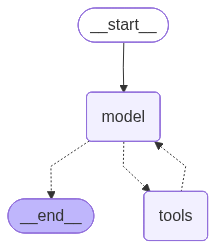

In [13]:
agent = create_agent(
    model=model,
    tools=[get_weather],
    system_prompt="你是一个智能助理，可以使用工具来帮助用户获取信息。"
)
agent

In [16]:
print("\n测试1：询问天气（需要工具）")



测试1：询问天气（需要工具）


In [17]:
response = agent.invoke({
    "messages":[{
        "role":"user",
        "content":"今天北京的天气怎么样？"
    }]
})
response

{'messages': [HumanMessage(content='今天北京的天气怎么样？', additional_kwargs={}, response_metadata={}, id='552f1031-657d-4dab-a675-d9278cd7bcec'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'dv84fbc4j', 'function': {'arguments': '{"city":"北京"}', 'name': 'get_weather'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 289, 'total_tokens': 303, 'completion_time': 0.037524781, 'completion_tokens_details': None, 'prompt_time': 0.014880934, 'prompt_tokens_details': None, 'queue_time': 0.160464955, 'total_time': 0.052405715}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_45180df409', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b3a81-0bb9-7711-9cb9-1d5201efdd8b-0', tool_calls=[{'name': 'get_weather', 'args': {'city': '北京'}, 'id': 'dv84fbc4j', 'type': 'tool_call'}], usage_metadata={'input_tokens': 289, 'output_tokens': 14, 'total_token

In [ ]:
print("\n测试2：普通问题（不需要工具）")



测试2：普通问题（不需要工具）


In [19]:
response = agent.invoke({
    "messages":[{
        "role":"user",
        "content":"你是谁？"
    }]
})
response


{'messages': [HumanMessage(content='你是谁？', additional_kwargs={}, response_metadata={}, id='d2f9d65d-9159-466e-a031-0387dec4f036'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '5gx4j7qzw', 'function': {'arguments': '{"city":"北京"}', 'name': 'get_weather'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 285, 'total_tokens': 299, 'completion_time': 0.059616782, 'completion_tokens_details': None, 'prompt_time': 0.014633323, 'prompt_tokens_details': None, 'queue_time': 0.060284426, 'total_time': 0.074250105}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_c06d5113ec', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b3a82-6ff8-71c2-aa2e-f3c64e582d8f-0', tool_calls=[{'name': 'get_weather', 'args': {'city': '北京'}, 'id': '5gx4j7qzw', 'type': 'tool_call'}], usage_metadata={'input_tokens': 285, 'output_tokens': 14, 'total_tokens': 299

In [20]:
print(f"\nAgent 回复：{response['messages'][-1].content}")



Agent 回复：我是一个智能助理，可以使用工具来帮助用户获取信息。例如，我可以使用“获取指定城市的天气信息”工具来获取北京的天气信息。如上所示，北京的天气信息是晴天，温度 15°C，空气质量良好。如果您需要其他信息，请告诉我，我将尽力帮助您。


In [22]:
print("""
示例2：配置多个工具的 Agent

Agent 会根据问题选择合适的工具
""")


示例2：配置多个工具的 Agent

Agent 会根据问题选择合适的工具



In [23]:
print("\n" + "="*70)
print("示例 2：多工具 Agent")
print("="*70)


示例 2：多工具 Agent


In [28]:
agent = create_agent(
    model=model,
    tools=[get_weather, calculator, web_search],
    system_prompt="你是一个智能助理，可以使用多种工具来帮助用户获取信息。"
)

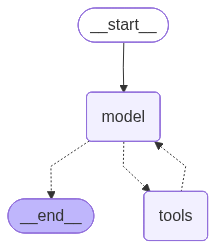

In [29]:
agent

In [31]:
tests = [
    "上海今天的天气怎么样？",
    "计算 12 乘以 12 的结果",
]

In [33]:
for i, question in enumerate(tests, 1):
        print(f"\n{'='*70}")
        print(f"测试 {i}：{question}")
        print(f"{'='*70}")

        response = agent.invoke({
            "messages": [{"role": "user", "content": question}]
        })

        # 显示最终回答
        print(response)
        print(f"\nAgent 回复：{response['messages'][-1].content}")
        print('*'*70+"\n")


测试 1：上海今天的天气怎么样？
{'messages': [HumanMessage(content='上海今天的天气怎么样？', additional_kwargs={}, response_metadata={}, id='940b2a44-448c-4f21-afbc-dcf39703a3a5'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'dh7ax15e3', 'function': {'arguments': '{"city":"上海"}', 'name': 'get_weather'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 607, 'total_tokens': 621, 'completion_time': 0.034981194, 'completion_tokens_details': None, 'prompt_time': 0.059393443, 'prompt_tokens_details': None, 'queue_time': 0.053417796, 'total_time': 0.094374637}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_68f543a7cc', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b3a88-7db6-72c2-a3b8-0a9404e22d64-0', tool_calls=[{'name': 'get_weather', 'args': {'city': '上海'}, 'id': 'dh7ax15e3', 'type': 'tool_call'}], usage_metadata={'input_tokens': 607, 'output_tokens': 

In [34]:
"""
示例3：自定义 Agent 的行为

使用 prompt 参数（注意：不是 system_prompt）
"""

'\n示例3：自定义 Agent 的行为\n\n使用 prompt 参数（注意：不是 system_prompt）\n'

In [35]:
print("\n" + "="*70)
print("示例 3：自定义 Agent 行为")
print("="*70)


示例 3：自定义 Agent 行为


In [36]:
system_message = """你是一个友好的助手。
特点：
- 回答简洁明了
- 使用工具前先说明
- 结果用表格或列表清晰展示"""

In [37]:
agent = create_agent(
    model=model,
    tools=[get_weather, calculator, web_search],
    system_prompt=system_message
)

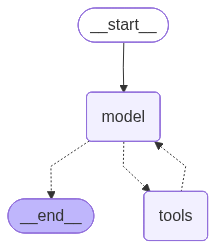

In [38]:
agent

In [39]:
print("\n测试：自定义行为的 Agent")
response = agent.invoke({
    "messages": [{"role": "user", "content": "北京天气如何？顺便算一下 100 加 50"}]
})


测试：自定义行为的 Agent


In [40]:
response

{'messages': [HumanMessage(content='北京天气如何？顺便算一下 100 加 50', additional_kwargs={}, response_metadata={}, id='b0eeb128-8e97-4fb2-804b-604c27f0cbfb'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'v0xa6cwy5', 'function': {'arguments': '{"city":"北京"}', 'name': 'get_weather'}, 'type': 'function'}, {'id': '31ys7kzeb', 'function': {'arguments': '{"a":100,"b":50,"operation":"add"}', 'name': 'calculator'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 38, 'prompt_tokens': 634, 'total_tokens': 672, 'completion_time': 0.101419367, 'completion_tokens_details': None, 'prompt_time': 0.062586897, 'prompt_tokens_details': None, 'queue_time': 0.053654401, 'total_time': 0.164006264}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_c06d5113ec', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b3a8c-18db-78e2-92d7-fcf5eaf3b0b8-0', tool_calls=[{'name': 'get_weather'

In [41]:
"""
示例4：查看 Agent 执行的完整过程

理解 Agent 如何一步步工作
"""

'\n示例4：查看 Agent 执行的完整过程\n\n理解 Agent 如何一步步工作\n'

In [42]:
print("\n" + "="*70)
print("示例 4：Agent 执行过程详解")
print("="*70)


示例 4：Agent 执行过程详解


In [43]:
agent = create_agent(
    model=model,
    tools=[calculator],
system_prompt="你是一个有帮助的助手。"
)

In [44]:
response = agent.invoke({
    "messages": [{"role": "user", "content": "25 乘以 8 等于多少？"}]
})

In [49]:
print("\n完整消息历史：")
for i, msg in enumerate(response['messages'], 1):
    print(f"\n--- 消息 {i} ({msg.__class__.__name__}) ---")
    if hasattr(msg, 'content'):
        print(f"内容：{msg.content}")
    if hasattr(msg, 'tool_calls') and msg.tool_calls:
        print(f"工具调用：{msg.tool_calls}")


完整消息历史：

--- 消息 1 (HumanMessage) ---
内容：25 乘以 8 等于多少？

--- 消息 2 (AIMessage) ---
内容：
工具调用：[{'name': 'calculator', 'args': {'a': 25, 'b': 8, 'operation': 'multiply'}, 'id': 'zetxbf5bh', 'type': 'tool_call'}]

--- 消息 3 (ToolMessage) ---
内容：25.0 multiply 8.0 = 200.0

--- 消息 4 (AIMessage) ---
内容：结果是200。


In [51]:
for i,message in enumerate(response["messages"],1):
    print(f"\n===消息 {i} ({message.__class__.__name__})===")
    if hasattr(message, 'content') and message.content:
        print(f"内容：{message.content}")
    if hasattr(message, 'tool_calls') and message.tool_calls:
        print(f"工具调用：{message.tool_calls}")


===消息 1 (HumanMessage)===
内容：25 乘以 8 等于多少？

===消息 2 (AIMessage)===
工具调用：[{'name': 'calculator', 'args': {'a': 25, 'b': 8, 'operation': 'multiply'}, 'id': 'zetxbf5bh', 'type': 'tool_call'}]

===消息 3 (ToolMessage)===
内容：25.0 multiply 8.0 = 200.0

===消息 4 (AIMessage)===
内容：结果是200。


In [53]:
print("""
示例5：Agent 的多轮对话

关键：使用 MemorySaver 保持对话历史
""")


示例5：Agent 的多轮对话

关键：使用 MemorySaver 保持对话历史



In [54]:
print("\n" + "="*70)
print("示例 5：多轮对话 Agent")
print("="*70)


示例 5：多轮对话 Agent


In [78]:
memory = MemorySaver()

In [79]:
# 创建带记忆功能的Agent
agent = create_agent(
    model= model,
    tools=[get_weather, calculator, web_search],
    system_prompt="你是一个智能助理，可以使用多种工具来帮助用户获取信息。",
    checkpointer=memory
)

In [80]:
# 使用thread_id 保持对话历史
config = {"configurable":{
    "thread_id": "conversation_1"
}}

In [81]:
response1 = agent.invoke({"messages": [{"role": "user", "content": "10 加 5 等于多少？"}]},
    config=config
)

In [82]:
response1

{'messages': [HumanMessage(content='10 加 5 等于多少？', additional_kwargs={}, response_metadata={}, id='8bb67e58-43c1-4aae-928b-78614c6db85a'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'sxy17trnz', 'function': {'arguments': '{"a":10,"b":5,"operation":"add"}', 'name': 'calculator'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 607, 'total_tokens': 632, 'completion_time': 0.062854786, 'completion_tokens_details': None, 'prompt_time': 0.029814802, 'prompt_tokens_details': None, 'queue_time': 0.053422267, 'total_time': 0.092669588}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_68f543a7cc', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b3aa1-25e3-7083-9501-a9f550d486e7-0', tool_calls=[{'name': 'calculator', 'args': {'a': 10, 'b': 5, 'operation': 'add'}, 'id': 'sxy17trnz', 'type': 'tool_call'}], usage_metadata={'input_tokens

In [83]:
print("\n 用户：再乘以3呢？")
response2 = agent.invoke({
    "messages": [{"role": "user", "content": "再乘以3呢？"}]
    },config={"configurable":{
    "thread_id": "conversation_1"
}})


 用户：再乘以3呢？


In [84]:
response2

{'messages': [HumanMessage(content='10 加 5 等于多少？', additional_kwargs={}, response_metadata={}, id='8bb67e58-43c1-4aae-928b-78614c6db85a'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'sxy17trnz', 'function': {'arguments': '{"a":10,"b":5,"operation":"add"}', 'name': 'calculator'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 607, 'total_tokens': 632, 'completion_time': 0.062854786, 'completion_tokens_details': None, 'prompt_time': 0.029814802, 'prompt_tokens_details': None, 'queue_time': 0.053422267, 'total_time': 0.092669588}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_68f543a7cc', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b3aa1-25e3-7083-9501-a9f550d486e7-0', tool_calls=[{'name': 'calculator', 'args': {'a': 10, 'b': 5, 'operation': 'add'}, 'id': 'sxy17trnz', 'type': 'tool_call'}], usage_metadata={'input_tokens

In [71]:
print("\n关键点：")
print("  - 使用 MemorySaver 作为 checkpointer")
print("  - 通过 thread_id 区分不同的对话")
print("  - Agent 自动记住上下文")
print("  - 不需要手动传递历史消息")


关键点：
  - 使用 MemorySaver 作为 checkpointer
  - 通过 thread_id 区分不同的对话
  - Agent 自动记住上下文
  - 不需要手动传递历史消息


In [85]:
print("\n" + "="*70)
print("示例 6：Agent 最佳实践")
print("="*70)

print("""
最佳实践：

1. 工具选择
- 只给 Agent 需要的工具（工具太多会混淆）
- 工具的 docstring 要清晰
- 每个工具功能单一

2. System Prompt
- 明确说明 Agent 的角色
- 定义输出格式
- 说明何时使用工具

3. 错误处理
- 工具内部捕获异常
- 返回友好的错误信息
- Agent 可以处理工具失败

4. 性能优化
- 减少不必要的工具调用
- 缓存常用查询结果
- 使用流式输出（后续学习）

5. 测试
- 测试各种问题类型
- 测试边界情况
- 验证工具选择是否正确

6. API 注意事项（LangChain 1.0）
- 使用 create_agent（LangChain 1.0 新 API）
- LangChain 1.0 新 API
- 使用 MemorySaver 实现多轮对话
""")



示例 6：Agent 最佳实践

最佳实践：

1. 工具选择
- 只给 Agent 需要的工具（工具太多会混淆）
- 工具的 docstring 要清晰
- 每个工具功能单一

2. System Prompt
- 明确说明 Agent 的角色
- 定义输出格式
- 说明何时使用工具

3. 错误处理
- 工具内部捕获异常
- 返回友好的错误信息
- Agent 可以处理工具失败

4. 性能优化
- 减少不必要的工具调用
- 缓存常用查询结果
- 使用流式输出（后续学习）

5. 测试
- 测试各种问题类型
- 测试边界情况
- 验证工具选择是否正确

6. API 注意事项（LangChain 1.0）
- 使用 create_agent（LangChain 1.0 新 API）
- LangChain 1.0 新 API
- 使用 MemorySaver 实现多轮对话



In [86]:
print("\n示例：良好配置的 Agent")

agent = create_agent(
    model=model,
    tools=[get_weather, calculator],
    system_prompt="""你是一个专业的助手。
工作流程：
1. 仔细理解用户问题
2. 如果需要工具，先说明将要做什么
3. 调用工具获取准确信息
4. 基于结果给出清晰答案

输出要求：
- 简洁明了
- 数据准确
- 格式清晰"""
)

print("\n测试：")
response = agent.invoke({
    "messages": [{"role": "user", "content": "北京天气如何？"}]
})
print(f"Agent 回复：{response['messages'][-1].content}")


示例：良好配置的 Agent

测试：
Agent 回复：北京的天气是晴天，温度为15°C，空气质量良好。
